In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/Real-Data/Real_Combine.csv")

In [3]:
df.shape

(1090, 9)

In [4]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1090 non-null   float64
 1   TM      1090 non-null   float64
 2   Tm      1090 non-null   float64
 3   SLP     1090 non-null   float64
 4   H       1090 non-null   float64
 5   VV      1090 non-null   float64
 6   V       1090 non-null   float64
 7   VM      1090 non-null   float64
 8   PM 2.5  1088 non-null   float64
dtypes: float64(9)
memory usage: 76.8 KB


We can see that our data only numerical features

In [6]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [7]:
df.rename(columns={'T':"Average Temperature", 'TM':"Maximum temperature ", 'Tm':"Minimum temparature", 'SLP':"Atmospheric pressure ", 'H':"Average relative humidity", 'VV':"Total rainfall", 'V':"Average wind speed", 'VM':"Maximum sustained wind speed"},inplace=True)

# NULL VALUES

Lets check for null values in our data

In [8]:
df.isnull().sum()

Average Temperature             0
Maximum temperature             0
Minimum temparature             0
Atmospheric pressure            0
Average relative humidity       0
Total rainfall                  0
Average wind speed              0
Maximum sustained wind speed    0
PM 2.5                          2
dtype: int64

seams we have only 2 null values in PM 2.5 column

In [9]:
df[df["PM 2.5"].isnull()]

Average Temperature  Maximum temperature   Minimum temparature  \
184                  14.3                  19.2                 10.9   
1089                 12.0                  22.9                  3.8   

      Atmospheric pressure   Average relative humidity  Total rainfall  \
184                  1020.5                       91.0             1.6   
1089                 1021.2                       73.0             0.8   

      Average wind speed  Maximum sustained wind speed  PM 2.5  
184                  4.8                          11.1     NaN  
1089                 4.8                          25.9     NaN

Since only two null values we delete those rows

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

Average Temperature             0
Maximum temperature             0
Minimum temparature             0
Atmospheric pressure            0
Average relative humidity       0
Total rainfall                  0
Average wind speed              0
Maximum sustained wind speed    0
PM 2.5                          0
dtype: int64

Lets Plot the pair plot

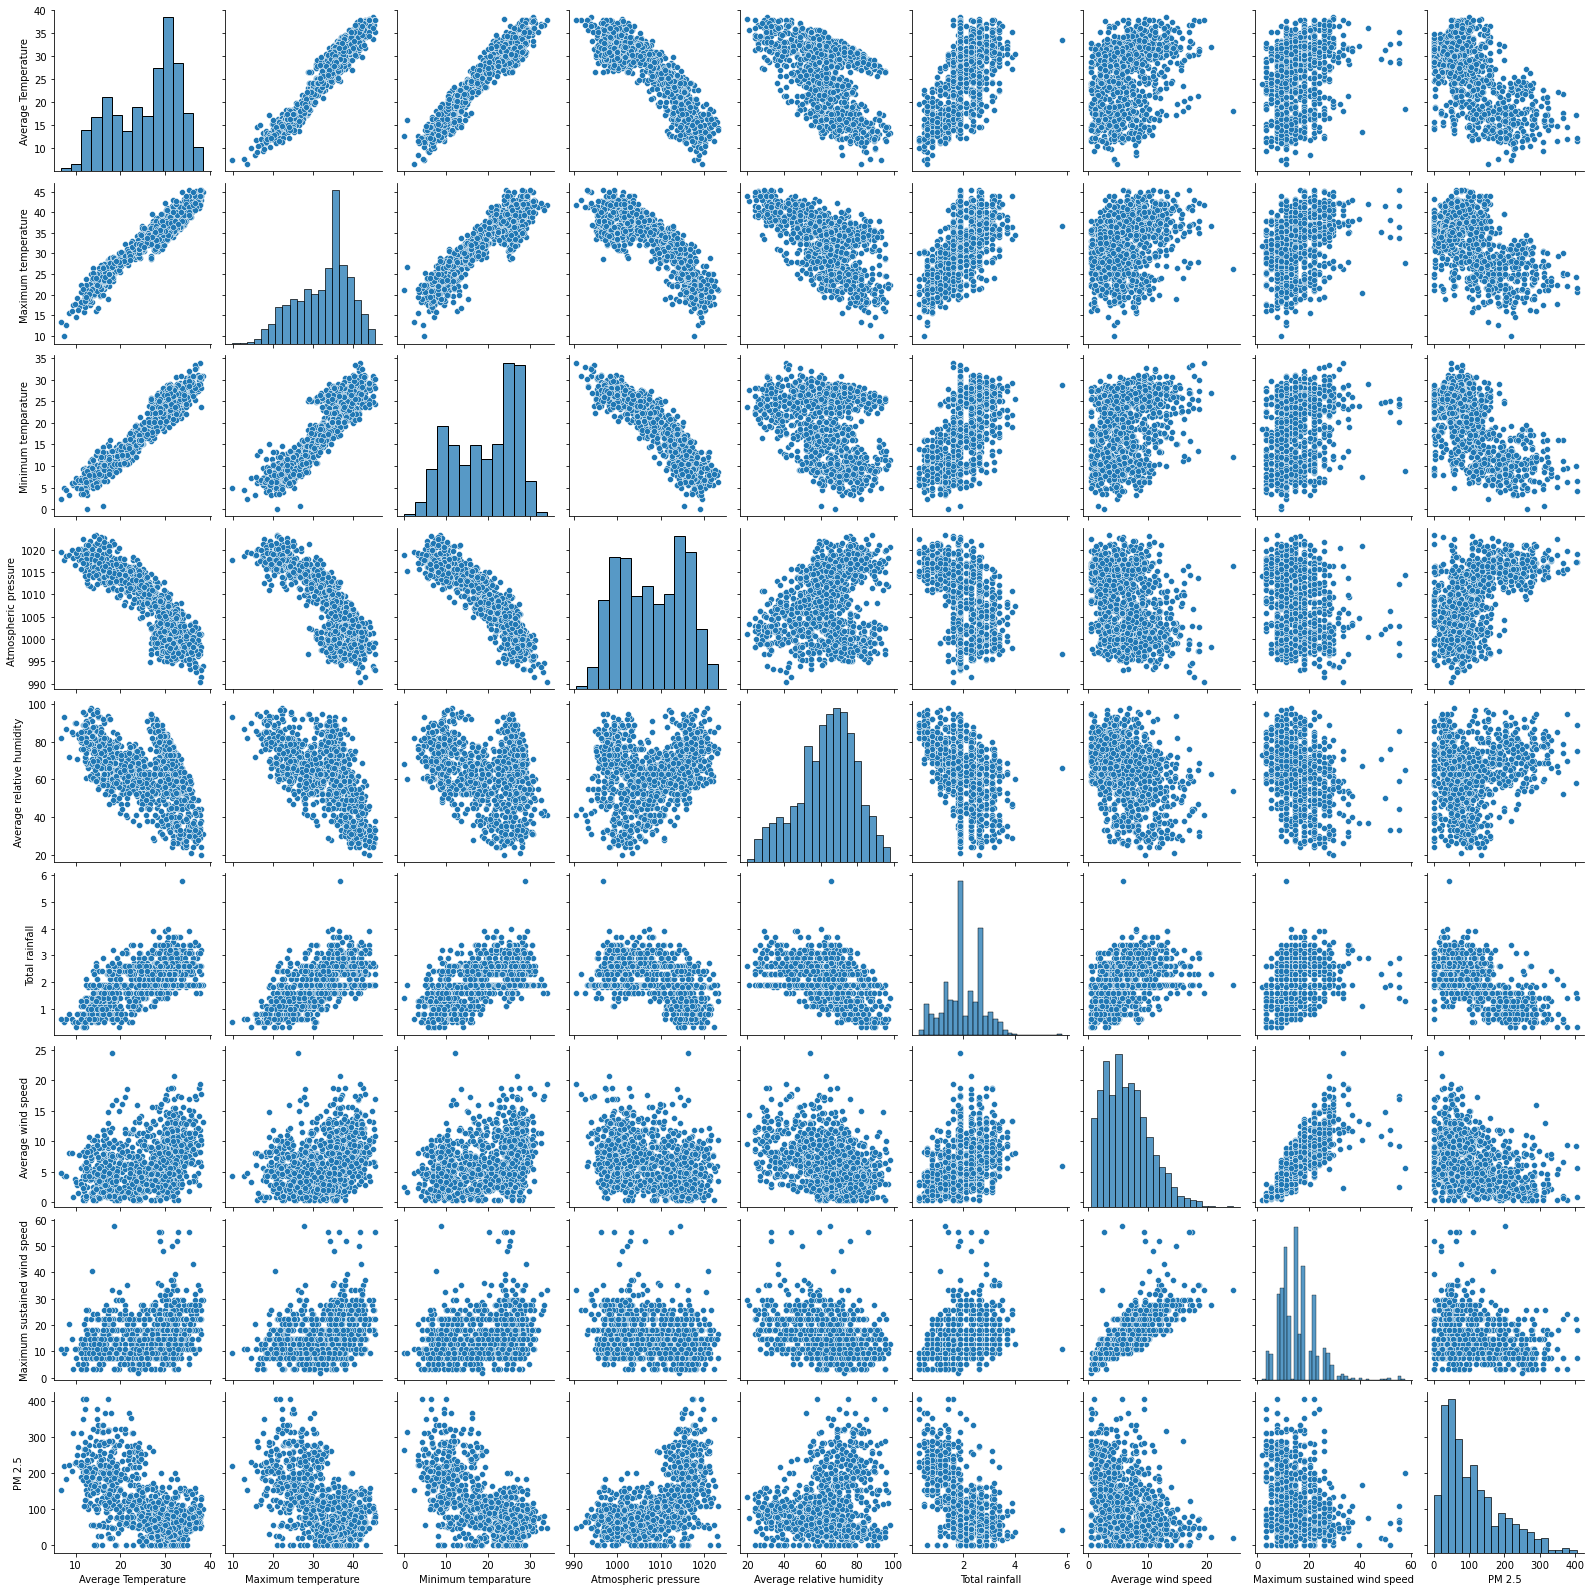

In [12]:
sns.pairplot(df)

We can see clearly that no independent feature has perfect coreleation with our dependent feature, we can also see the corelation using df.corr

In [13]:
df.corr()

Average Temperature  Maximum temperature   \
Average Temperature                      1.000000              0.963416   
Maximum temperature                      0.963416              1.000000   
Minimum temparature                      0.957227              0.889979   
Atmospheric pressure                    -0.883207             -0.826008   
Average relative humidity               -0.488919             -0.576799   
Total rainfall                           0.625547              0.598727   
Average wind speed                       0.320218              0.303218   
Maximum sustained wind speed             0.276548              0.285671   
PM 2.5                                  -0.629693             -0.565459   

                              Minimum temparature  Atmospheric pressure   \
Average Temperature                      0.957227              -0.883207   
Maximum temperature                      0.889979              -0.826008   
Minimum temparature                      1.000000              -0.912333   
Atmospheric pressure                    -0.912333               1.000000   
Average relative humidity               -0.275047               0.231971   
Total rainfall                           0.547490              -0.483494   
Average wind speed                       0.312165              -0.325862   
Maximum sustained wind speed             0.244408              -0.269129   
PM 2.5                                  -0.661733               0.605637   

                              Average relative humidity  Total rainfall  \
Average Temperature                           -0.488919        0.625547   
Maximum temperature                           -0.576799        0.598727   
Minimum temparature                           -0.275047        0.547490   
Atmospheric pressure                           0.231971       -0.483494   
Average relative humidity                      1.000000       -0.489597   
Total rainfall                                -0.489597        1.000000   
Average wind speed                            -0.356241        0.369851   
Maximum sustained wind speed                  -0.368694        0.325963   
PM 2.5                                         0.166577       -0.593327   

                              Average wind speed  \
Average Temperature                     0.320218   
Maximum temperature                     0.303218   
Minimum temparature                     0.312165   
Atmospheric pressure                   -0.325862   
Average relative humidity              -0.356241   
Total rainfall                          0.369851   
Average wind speed                      1.000000   
Maximum sustained wind speed            0.780952   
PM 2.5                                 -0.327917   

                              Maximum sustained wind speed    PM 2.5  
Average Temperature                               0.276548 -0.629693  
Maximum temperature                               0.285671 -0.565459  
Minimum temparature                               0.244408 -0.661733  
Atmospheric pressure                             -0.269129  0.605637  
Average relative humidity                        -0.368694  0.166577  
Total rainfall                                    0.325963 -0.593327  
Average wind speed                                0.780952 -0.327917  
Maximum sustained wind speed                      1.000000 -0.262848  
PM 2.5                                           -0.262848  1.000000

lets see using heat map

In [14]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<AxesSubplot:>

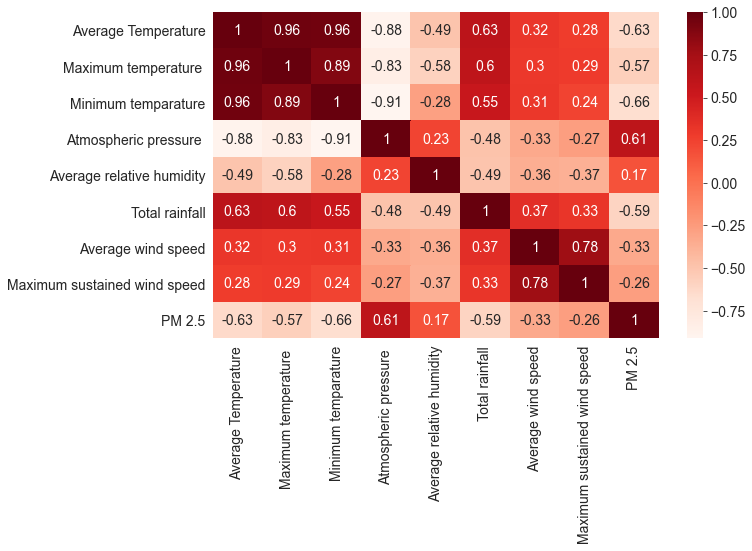

In [15]:
sns.heatmap(df.corr(),annot=True,cmap="Reds")

In [16]:
df.describe()

Average Temperature  Maximum temperature   Minimum temparature  \
count          1088.000000           1088.000000          1088.000000   
mean             25.701471             32.468199            19.343658   
std               7.216849              6.680750             7.570776   
min               6.700000              9.800000             0.000000   
25%              19.000000             27.775000            12.100000   
50%              27.950000             34.400000            21.400000   
75%              31.400000             37.000000            26.000000   
max              38.500000             45.500000            34.000000   

       Atmospheric pressure   Average relative humidity  Total rainfall  \
count            1088.000000                1088.000000     1088.000000   
mean             1007.942096                  63.336397        2.009467   
std                 7.537081                  15.849188        0.728429   
min               990.400000                  20.000000        0.300000   
25%              1001.200000                  54.000000        1.600000   
50%              1007.900000                  65.000000        1.900000   
75%              1014.800000                  75.000000        2.600000   
max              1023.200000                  98.000000        5.800000   

       Average wind speed  Maximum sustained wind speed       PM 2.5  
count         1088.000000                   1088.000000  1088.000000  
mean             6.487776                     15.662316   108.255729  
std              3.892125                      7.567607    82.288271  
min              0.400000                      1.900000     0.000000  
25%              3.500000                     11.100000    43.958333  
50%              5.900000                     14.800000    83.458333  
75%              8.900000                     18.300000   152.686458  
max             24.400000                     57.600000   404.500000

1. We can see that avg temparature in banglore is around 25
2. Highest temparature recorded is 45degrees and minimum temparature is showing 0degrees seems not possible thinks it as outlier.

In [17]:
import plotly.express as px

In [18]:
fig=px.histogram(df,x="Average Temperature",marginal="box")
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
fig=px.histogram(df,x='Maximum temperature ',marginal="box")
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
fig=px.histogram(df,x='Minimum temparature',marginal="box",nbins=50)
fig.update_layout(bargap=0.1)
fig.show()

In [21]:
fig=px.histogram(df,x='Average wind speed',marginal="box")
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
fig=px.histogram(df,x='PM 2.5',marginal="box")
fig.update_layout(bargap=0.1)
fig.show()

Dividing data into Independent & dependent Features

In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [24]:
X.head(2)

Average Temperature  Maximum temperature   Minimum temparature  \
0                  7.4                   9.8                  4.8   
1                  7.8                  12.7                  4.4   

   Atmospheric pressure   Average relative humidity  Total rainfall  \
0                 1017.6                       93.0             0.5   
1                 1018.5                       87.0             0.6   

   Average wind speed  Maximum sustained wind speed  
0                 4.3                           9.4  
1                 4.4                          11.1

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

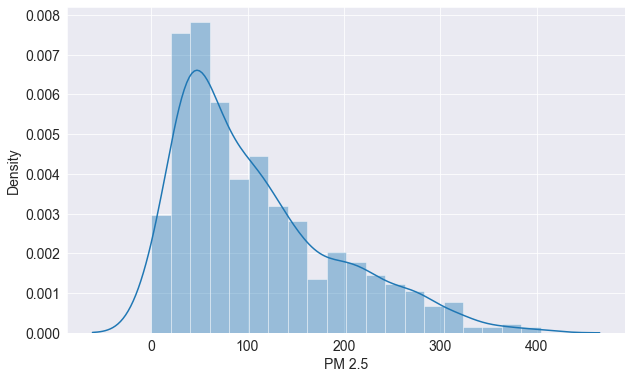

In [25]:
sns.distplot(y)

Seems like right skewed distrubution

## Test Train Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Model creation

In [27]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
regressor.coef_

array([  0.73586574,   0.49422152,  -5.78546447,   0.53008447,
        -0.7345896 , -43.45735865,  -1.92997688,   0.08983924])

In [29]:
regressor.intercept_

-201.8468700859104

R-square value

In [30]:
regressor.score(X_train, y_train)

0.5558460401426302

In [31]:
regressor.score(X_test, y_test)

0.5002132050072754

In [32]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [33]:
score.mean()

0.49620571872402613

In [34]:
score.min()

0.43619184833967606

model evalution

In [35]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Average Temperature              0.735866
Maximum temperature              0.494222
Minimum temparature             -5.785464
Atmospheric pressure             0.530084
Average relative humidity       -0.734590
Total rainfall                 -43.457359
Average wind speed              -1.929977
Maximum sustained wind speed     0.089839

Interpreting the coefficients:

* Holding all other features fixed, a 1 unit increase in Average Temperature is associated with an decrease of 2.690 in AQI PM2.5 .
* Holding all other features fixed, a 1 unit increase in Maximum temperature is associated with an increase of 0.46 in AQI PM 2.5 .

In [36]:
prediction=regressor.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

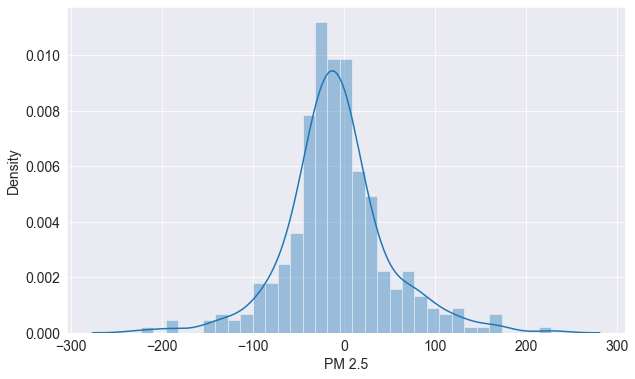

In [37]:
sns.distplot(y_test-prediction)

In [38]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.542465311325195
MSE: 3226.014432469145
RMSE: 56.79801433561868


In [39]:
import pickle 
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)

## Decission Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [42]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [43]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.16688865005271325


#### Clearly we can see we got R^2 1 in train set and 0.22 in test data , seems the decission tree model is over fitted.

* The overfitting is pretty normal in decission tree case we can prevent it by using hyperparameters.
* First lets see how the tree is constructed using tree diagram.

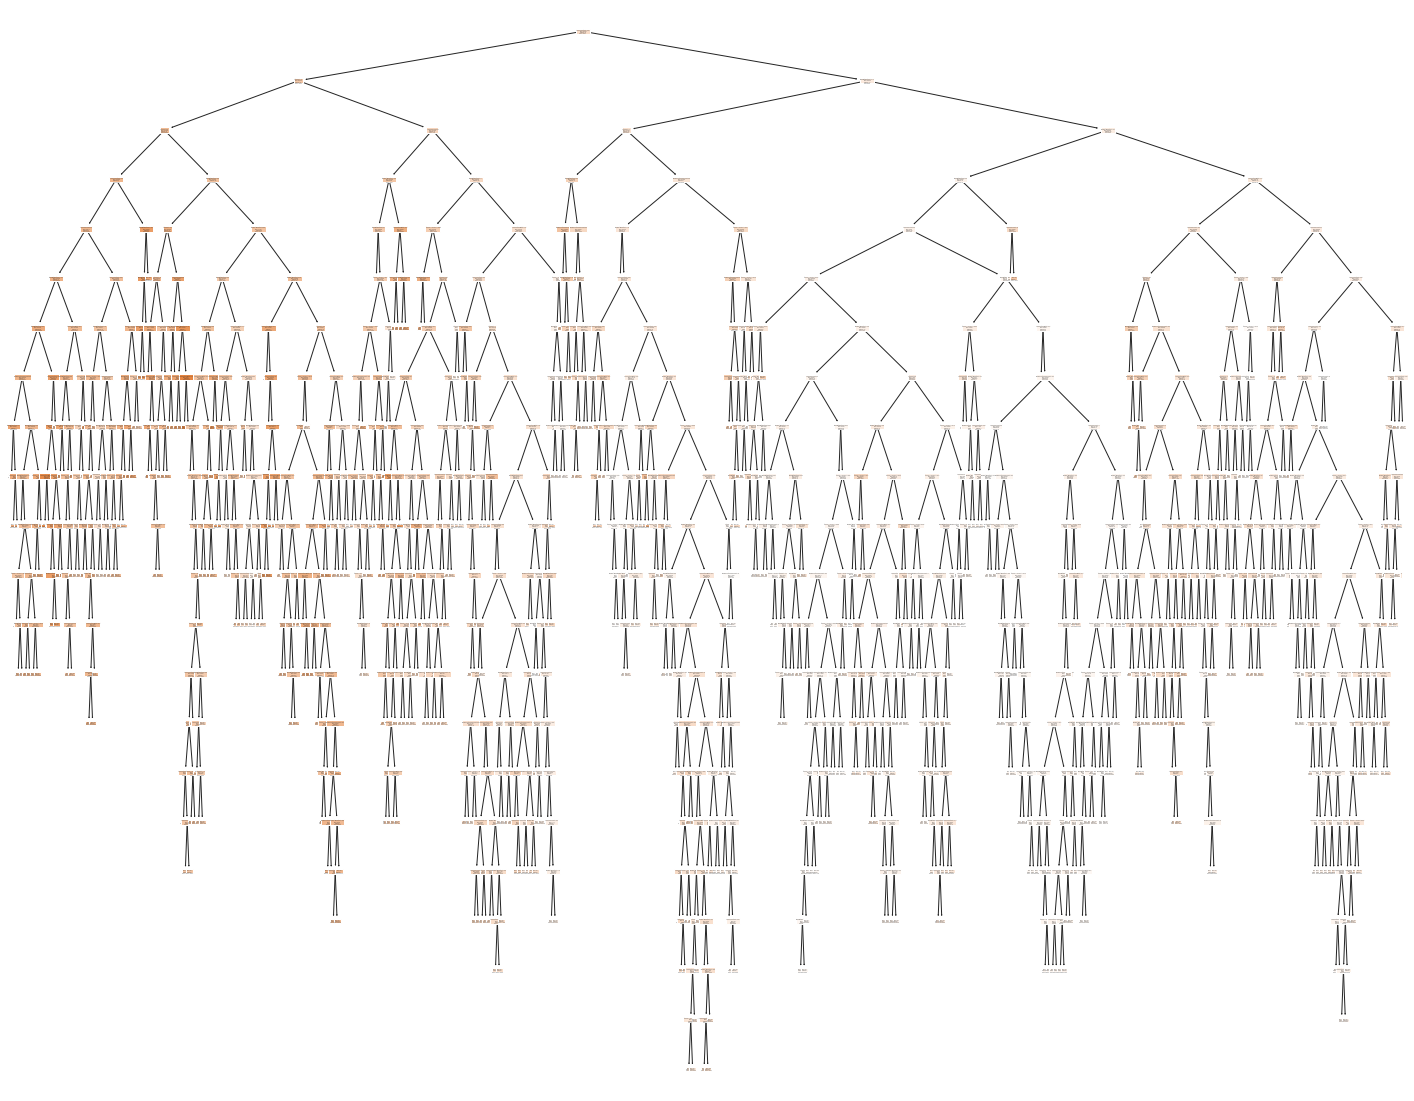

In [44]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=X.columns,  
                   class_names="PM 2.5",
                   filled=True)

* We can clearly see that the decission tree goes so deep into the features which result in overfitting.
* 3 Techniques to Avoid Overfitting of Decision Trees, they are pre-pruning, post-pruning, and ensemble of Decision Trees

# Cross validation

In [45]:
from sklearn.model_selection import cross_val_score
dtree=DecisionTreeRegressor(criterion="mse")
score=cross_val_score(dtree,X,y,cv=5)

In [46]:
score.mean()

0.05030252285905399

In [47]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

### Splitter:

* The splitter is used to decide which feature and which threshold is used.

* Using best, the model if taking the feature with the highest importance
* Using random, the model if taking the feature randomly but with the same distribution (in gini, proline have an importance of 38% so it will be taken in 38% of cases)

### Maximum tree depth
* You can customize the binary decision tree by specifying the tree depth. The tree depth is an INTEGER value. Maximum tree depth is a limit to stop further splitting of nodes when the specified tree depth has been reached during the building of the initial decision tree.

### Min_sample_leaf
* The min_samples_leaf parameter checks before the node is generated, that is, if the possible split results in a child with fewer samples, the split will be avoided (since the minimum number of samples for the child to be a leaf has not been reached) and the node will be replaced by a leaf.

### min_weight_fraction_leaf: float, optional (default=0.)
* The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

### max_features: int, float, string or None, optional (default=None)
* The number of features to consider when looking for the best split:
* If int, then consider max_features features at each split.
* If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
* If “auto”, then max_features=sqrt(n_features).
* If “sqrt”, then max_features=sqrt(n_features).
* If “log2”, then max_features=log2(n_features).
* If None, then max_features=n_features.

In [48]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeRegressor(criterion="mse")
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10)

#### n_jobs
The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.

In [49]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [50]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 1 minutes and 53.94 seconds.


In [51]:
random_search.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [52]:
random_search.best_score_

-3043.583806541804

In [55]:
from sklearn.metrics import r2_score

In [56]:
y_pred = random_search.predict(X_test)

In [57]:
r2_score(y_test,y_pred)

0.4704048141400632

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

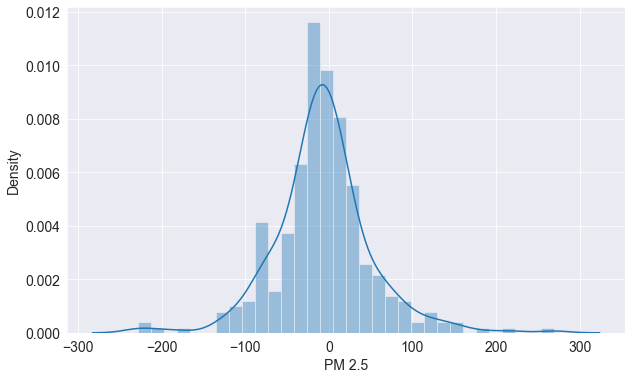

In [53]:
predictions=random_search.predict(X_test)
sns.distplot(y_test-predictions)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.89976555248956
MSE: 3418.4210748809514
RMSE: 58.46726498546816


Metrics Linear regression vs decission tree

# Linear Regression
* MAE: 40.542465311325195
* MSE: 3226.014432469145
* RMSE: 56.79801433561868

# DEcission Tree
* MAE: 40.89976555248956
* MSE: 3418.4210748809514
* RMSE: 58.46726498546816

* Seems there is no much difference in both metrics

In [58]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)

## Now lets use some Ensemble techniques

* Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would.

* The three main classes of ensemble learning methods are bagging, stacking, and boosting,

### Lets use Random Forest regressor which comes under bagging Technique.

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

In [62]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [65]:
rf_regressor.score(X_train,y_train)

0.9432392932979352

In [66]:
rf_regressor.score(X_test,y_test)

0.5672452163503541

### Seems random forest gets overfitted, lets do cross validation

In [74]:
from sklearn.model_selection import cross_val_score
rf_regressor = RandomForestRegressor()
score=cross_val_score(rf_regressor,X_train,y_train,cv=10)

In [73]:
score.mean()

0.5431521089765903

In [103]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt',None,"log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', None, 'log2'], 'max_depth': [1, 6, 12, 18, 23, 29, 35, 41, 46, 52, 58, 64, 69, 75, 81, 87, 92, 98, 104, 110, None], 'min_samples_split': [2, 3, 4, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True, False]}


In [104]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)


In [105]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 6, 12, 18, 23, 29, 35,
                                                      41, 46, 52, 58, 64, 69,
                                                      75, 81, 87, 92, 98, 104,
                                                      110, None],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]

In [106]:
rf_random.best_score_

0.6055775072419468

In [107]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 46,
 'bootstrap': True}

## XG_Boost

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [113]:
import xgboost as xgb
#conda install -c ananconda py-xgboost
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [114]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9990989070257749


In [115]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5101091949087682


In [117]:
from sklearn.model_selection import cross_val_score
regressor=xgb.XGBRegressor()
score=cross_val_score(regressor,X_train,y_train,cv=5)
score.mean()

0.532138837923256

## Hyperparameter Tuning

In [118]:
xgb.XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [119]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [120]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.2s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.3s
[CV] END learning_ra

[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.8s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.7s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.8s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.8s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsa

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsampl

[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   4.4s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   4.5s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   4.2s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   4.5s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   3.0s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   2.8s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   2.9s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   2.8s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, sub

[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsampl

[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100, n_jobs=1,
                   para

In [121]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 15,
 'learning_rate': '0.05'}

In [122]:
xg_random.best_score_

-2867.9224567285614

In [123]:
predictions=xg_random.predict(X_test)

In [124]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 37.073663316079234
MSE: 2690.779159763467
RMSE: 51.872720766925916


In [127]:
r2_score(y_test,predictions)

0.583133950438623

In [144]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

## KNN

In [133]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [134]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [135]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.0740030345207896


In [136]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [137]:
score.mean()

-0.0925614653378894

### HyperTunning

In [138]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

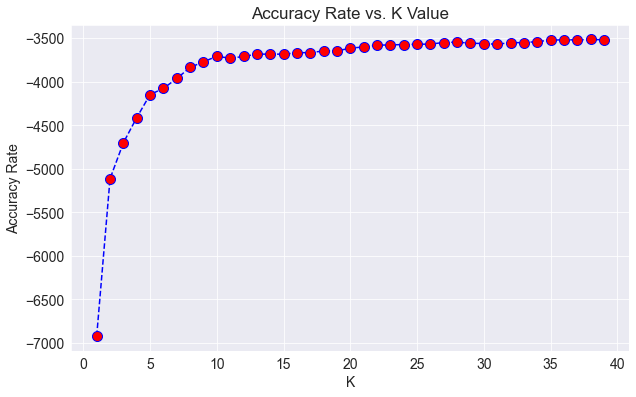

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [140]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [141]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 52.14402395514781
MSE: 5977.1078487618925
RMSE: 77.31175750661663


In [142]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [143]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 43.479085966700644
MSE: 3992.980774023578
RMSE: 63.19003698387569
